In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
df = pd.read_csv("../data/clean/Macro_Clean.csv")
df["date"] = pd.to_datetime(df["date"])
df["Year"] = df["date"].dt.year
df.set_index("date", inplace=True)

In [307]:
df.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,debt_public_pct_gdp,debt_domestic_pct_gdp,debt_external_pct_gdp,capital_adequacy,npl_ratio,cieg_real_growth,cieg_real_level,m2_plus_yoy,private_credit_yoy,Year
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.49293,0.39599,0.25753,NaN,27.0,NaN,37.5,NaN,14.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.05,NaN,NaN,2000
2000-02-01,0.49663,0.39286,0.25966,NaN,27.0,NaN,37.5,NaN,14.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.63,NaN,NaN,2000
2000-03-01,0.51467,0.40585,0.26900,NaN,27.0,NaN,37.5,NaN,15.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.07,NaN,NaN,2000
2000-04-01,0.52889,0.41021,0.27570,NaN,27.0,NaN,37.5,NaN,17.51,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,92.16,NaN,NaN,2000
2000-05-01,0.54453,0.41831,0.27953,NaN,27.0,NaN,37.5,NaN,18.72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.03,NaN,NaN,2000


In [308]:
df.isna().sum()

m2_plus                    8
m2                         8
m1                         8
private_credit            19
policy_rate                8
interbank_rate            32
lending_rate               8
gh_ref_rate              227
inflation_headline         8
inflation_food            80
inflation_nonfood         80
inflation_core           164
trade_balance_usd         68
exports_usd               68
imports_usd               68
gross_reserves_usd        32
net_reserves_usd          32
debt_public_pct_gdp      181
debt_domestic_pct_gdp    181
debt_external_pct_gdp    181
capital_adequacy          92
npl_ratio                 80
cieg_real_growth          23
cieg_real_level           10
m2_plus_yoy               12
private_credit_yoy        23
Year                       0
dtype: int64

In [309]:
df.dtypes

m2_plus                  float64
m2                       float64
m1                       float64
private_credit           float64
policy_rate              float64
interbank_rate           float64
lending_rate             float64
gh_ref_rate              float64
inflation_headline       float64
inflation_food           float64
inflation_nonfood        float64
inflation_core           float64
trade_balance_usd        float64
exports_usd              float64
imports_usd              float64
gross_reserves_usd       float64
net_reserves_usd         float64
debt_public_pct_gdp      float64
debt_domestic_pct_gdp    float64
debt_external_pct_gdp    float64
capital_adequacy         float64
npl_ratio                float64
cieg_real_growth         float64
cieg_real_level          float64
m2_plus_yoy              float64
private_credit_yoy       float64
Year                       int32
dtype: object

In [310]:
fx = pd.read_csv("../data/clean/fx.csv")
fx["Date"] = pd.to_datetime(fx["Date"])
fx.set_index("Date", inplace=True)

In [311]:
fx.head()

,Buying,Selling,Mid Rate
Date,,,
2007-07-09,0.9216,0.9315,0.9266
2007-07-10,0.9216,0.9315,0.9266
2007-07-11,0.9216,0.9315,0.9266
2007-07-12,0.9218,0.9317,0.9268
2007-07-13,0.9218,0.9317,0.9268


In [312]:
df = pd.merge(df, fx, left_index=True, right_index=True, how='inner')

In [313]:
df.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,capital_adequacy,npl_ratio,cieg_real_growth,cieg_real_level,m2_plus_yoy,private_credit_yoy,Year,Buying,Selling,Mid Rate
2007-08-01,4.75726,3.70662,2.13430,2.73050,12.50,11.71,24.25,NaN,10.41,10.03,...,15.01,6.83,17.73,200.48,35.012118,58.906135,2007,0.9230,0.9345,0.9288
2007-10-01,5.13003,4.11015,2.61923,3.04774,12.50,12.44,24.25,NaN,10.14,8.81,...,14.90,6.59,19.81,191.82,36.959308,59.158394,2007,0.9316,0.9453,0.9385
2008-02-01,5.75847,4.58013,2.71302,3.42766,13.50,12.02,24.17,NaN,13.21,11.23,...,14.86,8.45,21.48,203.54,36.161726,58.697514,2008,0.9579,0.9804,0.9692
2008-04-01,6.01074,4.75626,2.78303,3.64642,14.25,12.56,24.35,NaN,15.29,13.15,...,14.49,8.72,23.59,213.19,34.449206,57.167179,2008,0.9643,0.9853,0.9748
2008-08-01,6.69486,4.98611,2.86586,4.30304,17.00,17.39,24.08,NaN,18.10,17.56,...,14.32,7.37,11.35,223.24,40.729327,57.591650,2008,1.0459,1.0844,1.0652


In [314]:
df = df.drop(columns=["Buying", "Selling"])

## Feature Engineering

In [315]:
df = df.dropna(how="all")
df.isna().sum()

m2_plus                   4
m2                        4
m1                        4
private_credit            4
policy_rate               4
interbank_rate            4
lending_rate              4
gh_ref_rate              69
inflation_headline        4
inflation_food            4
inflation_nonfood         4
inflation_core           39
trade_balance_usd         4
exports_usd               4
imports_usd               4
gross_reserves_usd        4
net_reserves_usd          4
debt_public_pct_gdp      47
debt_domestic_pct_gdp    47
debt_external_pct_gdp    47
capital_adequacy          4
npl_ratio                 4
cieg_real_growth          5
cieg_real_level           5
m2_plus_yoy               0
private_credit_yoy        0
Year                      0
Mid Rate                  0
dtype: int64

In [316]:
df["real_policy_rate"] = df["policy_rate"] - df["inflation_headline"]
df["real_interbank_rate"] = df["interbank_rate"] - df["inflation_headline"]
df["real_lending_rate"] = df["lending_rate"] - df["inflation_headline"]

df["d_policy_rate"] = df["policy_rate"].diff()
df["d_inflation"]   = df["inflation_headline"].diff()

# Lags for timing tests
df["inflation_lag1"] = df["inflation_headline"].shift(1)
df["policy_rate_lag1"] = df["policy_rate"].shift(1)


In [317]:
df.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,private_credit_yoy,Year,Mid Rate,real_policy_rate,real_interbank_rate,real_lending_rate,d_policy_rate,d_inflation,inflation_lag1,policy_rate_lag1
2007-08-01,4.75726,3.70662,2.13430,2.73050,12.50,11.71,24.25,NaN,10.41,10.03,...,58.906135,2007,0.9288,2.09,1.30,13.84,NaN,NaN,NaN,NaN
2007-10-01,5.13003,4.11015,2.61923,3.04774,12.50,12.44,24.25,NaN,10.14,8.81,...,59.158394,2007,0.9385,2.36,2.30,14.11,0.00,-0.27,10.41,12.50
2008-02-01,5.75847,4.58013,2.71302,3.42766,13.50,12.02,24.17,NaN,13.21,11.23,...,58.697514,2008,0.9692,0.29,-1.19,10.96,1.00,3.07,10.14,12.50
2008-04-01,6.01074,4.75626,2.78303,3.64642,14.25,12.56,24.35,NaN,15.29,13.15,...,57.167179,2008,0.9748,-1.04,-2.73,9.06,0.75,2.08,13.21,13.50
2008-08-01,6.69486,4.98611,2.86586,4.30304,17.00,17.39,24.08,NaN,18.10,17.56,...,57.591650,2008,1.0652,-1.10,-0.71,5.98,2.75,2.81,15.29,14.25


In [318]:
df["log_m2_plus"] = np.log(df["m2_plus"])
df["log_credit"]  = np.log(df["private_credit"])


df["private_credit_real_yoy"] = df["private_credit_yoy"] - df["inflation_headline"]

In [319]:
# FX depreciation (monthly and 12-month)
df["fx_log"] = np.log(df["Mid Rate"])
df["fx_dep_m"] = df["fx_log"].diff() * 100         
df["fx_dep_12m"] = df["fx_log"].diff(12) * 100     


# Reserves changes and ratios
df["reserves_net_change_12m"] = df["net_reserves_usd"].diff(12)
# macro["reserves_net_pct_gdp"] = macro["net_reserves_usd"] / macro["nominal_gdp_usd"] * 100

# Import cover: months of imports
# Use 12-month moving average of imports as annual imports
im_12m = df["imports_usd"].rolling(12).mean()
df["reserves_months_imports"] = df["gross_reserves_usd"] / (im_12m / 12.0)


In [320]:
df.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,inflation_lag1,policy_rate_lag1,log_m2_plus,log_credit,private_credit_real_yoy,fx_log,fx_dep_m,fx_dep_12m,reserves_net_change_12m,reserves_months_imports
2007-08-01,4.75726,3.70662,2.13430,2.73050,12.50,11.71,24.25,NaN,10.41,10.03,...,NaN,NaN,1.559672,1.004485,48.496135,-0.073862,NaN,NaN,NaN,NaN
2007-10-01,5.13003,4.11015,2.61923,3.04774,12.50,12.44,24.25,NaN,10.14,8.81,...,10.41,12.50,1.635112,1.114400,49.018394,-0.063472,1.038943,NaN,NaN,NaN
2008-02-01,5.75847,4.58013,2.71302,3.42766,13.50,12.02,24.17,NaN,13.21,11.23,...,10.14,12.50,1.750672,1.231878,45.487514,-0.031284,3.218813,NaN,NaN,NaN
2008-04-01,6.01074,4.75626,2.78303,3.64642,14.25,12.56,24.35,NaN,15.29,13.15,...,13.21,13.50,1.793548,1.293746,41.877179,-0.025523,0.576133,NaN,NaN,NaN
2008-08-01,6.69486,4.98611,2.86586,4.30304,17.00,17.39,24.08,NaN,18.10,17.56,...,15.29,14.25,1.901340,1.459322,39.491650,0.063163,8.868553,NaN,NaN,NaN


In [321]:
df.isna().sum()

m2_plus                     4
m2                          4
m1                          4
private_credit              4
policy_rate                 4
interbank_rate              4
lending_rate                4
gh_ref_rate                69
inflation_headline          4
inflation_food              4
inflation_nonfood           4
inflation_core             39
trade_balance_usd           4
exports_usd                 4
imports_usd                 4
gross_reserves_usd          4
net_reserves_usd            4
debt_public_pct_gdp        47
debt_domestic_pct_gdp      47
debt_external_pct_gdp      47
capital_adequacy            4
npl_ratio                   4
cieg_real_growth            5
cieg_real_level             5
m2_plus_yoy                 0
private_credit_yoy          0
Year                        0
Mid Rate                    0
real_policy_rate            4
real_interbank_rate         4
real_lending_rate           4
d_policy_rate               5
d_inflation                 5
inflation_

In [322]:
# Changes in debt ratios
df["debt_public_change"] = df["debt_public_pct_gdp"].diff()
df["debt_external_change"] = df["debt_external_pct_gdp"].diff()

# Banking stress indicators (normalized)
df["npl_change"] = df["npl_ratio"].diff()
df["capital_adequacy_gap"] = df["capital_adequacy"] - 10


In [323]:
df.shape

(106, 47)

In [324]:
pop = pd.read_csv("../data/clean/population.csv")

In [325]:
pop.head()

,Year,Population
0,1950,5077596
1,1951,5220288
2,1952,5373395
3,1953,5535165
4,1954,5706212


In [326]:
df['Year'] = df.index.year
pop = pop.set_index('Year')

In [327]:
pop.head()

,Population
Year,
1950,5077596
1951,5220288
1952,5373395
1953,5535165
1954,5706212


In [328]:
df["Year"] = df["date"].dt.year
df = df.merge(pop, left_on="Year", right_index=True, how="left")

KeyError: 'date'

In [ ]:
df.head()

In [329]:
unem = pd.read_csv("../data/clean/unemployment.csv")

In [330]:
unem.head()

,Year,Unemployment Rate
0,1991,3.49
1,1992,4.70
2,1993,5.24
3,1994,5.90
4,1995,6.48


In [331]:
unem.set_index("Year", inplace=True)
df = df.merge(unem, left_on="Year", right_index=True, how="left")

In [332]:
df.tail()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,fx_log,fx_dep_m,fx_dep_12m,reserves_net_change_12m,reserves_months_imports,debt_public_change,debt_external_change,npl_change,capital_adequacy_gap,Unemployment Rate
2023-03-01,206.82435,148.131,94.9597,65.7283,29.5,25.87,35.87,32.91,45.0,50.8,...,2.399213,1.971275,62.410770,-4.68097,51.320279,NaN,NaN,0.29,4.2,3.06
2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.395246,-0.396627,61.721396,NaN,NaN,NaN,NaN,NaN,NaN,3.06
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.398177,0.293074,58.944576,NaN,NaN,NaN,NaN,NaN,NaN,3.06
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.399775,0.159827,49.757825,NaN,NaN,NaN,NaN,NaN,NaN,3.06
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.442286,4.251084,48.050267,NaN,NaN,NaN,NaN,NaN,NaN,3.06


In [333]:
gdp = pd.read_csv("../data/clean/gdp.csv")

In [334]:
gdp.head()

,quarter_date,agri_gdp,ind_gdp,svc_gdp,Total Value Added (basic prices),Net indirect Taxes,Total GDP (purchaser prices),gdp_informal,gdp_non_oil,agri_gdp_yoy,ind_gdp_yoy,svc_gdp_yoy,Total GDP (purchaser prices).1,gdp_informal_yoy,gdp_non_oil_yoy
0,2013-03-31 23:59:59.999999999,"6,698.2","11,056.7","10,733.0","28,487.9","1,319.6","29,807.5","8,261.5","28,038.9",18.6,8.1,2.4,7.9,13.6,7.1
1,2013-06-30 23:59:59.999999999,"5,521.8","10,753.2","12,632.2","28,907.2","1,507.6","30,414.8","7,261.9","28,715.7",49.4,14.5,4.4,14.2,35.2,12.8
2,2013-09-30 23:59:59.999999999,"5,933.7","10,335.5","12,666.1","28,935.2","1,514.2","30,449.4","7,617.2","28,924.8",-14.5,-0.6,18.1,3.5,-9.6,3.3
3,2013-12-31 23:59:59.999999999,"7,202.2","10,288.8","14,492.4","31,983.5","1,822.4","33,805.9","9,039.0","32,149.4",-6.6,-3.4,17.2,4.3,-1.4,4.4
4,2014-03-31 23:59:59.999999999,"6,594.6","9,859.3","11,780.5","28,234.3","1,243.8","29,478.1","8,230.8","27,670.0",-1.5,-10.8,9.8,-1.1,-0.4,-1.3


In [335]:
gdp["quarter_date"] = pd.to_datetime(gdp["quarter_date"])
gdp = gdp.set_index("quarter_date")

In [336]:
gdp.head()

,agri_gdp,ind_gdp,svc_gdp,Total Value Added (basic prices),Net indirect Taxes,Total GDP (purchaser prices),gdp_informal,gdp_non_oil,agri_gdp_yoy,ind_gdp_yoy,svc_gdp_yoy,Total GDP (purchaser prices).1,gdp_informal_yoy,gdp_non_oil_yoy
quarter_date,,,,,,,,,,,,,,
2013-03-31 23:59:59.999999999,"6,698.2","11,056.7","10,733.0","28,487.9","1,319.6","29,807.5","8,261.5","28,038.9",18.6,8.1,2.4,7.9,13.6,7.1
2013-06-30 23:59:59.999999999,"5,521.8","10,753.2","12,632.2","28,907.2","1,507.6","30,414.8","7,261.9","28,715.7",49.4,14.5,4.4,14.2,35.2,12.8
2013-09-30 23:59:59.999999999,"5,933.7","10,335.5","12,666.1","28,935.2","1,514.2","30,449.4","7,617.2","28,924.8",-14.5,-0.6,18.1,3.5,-9.6,3.3
2013-12-31 23:59:59.999999999,"7,202.2","10,288.8","14,492.4","31,983.5","1,822.4","33,805.9","9,039.0","32,149.4",-6.6,-3.4,17.2,4.3,-1.4,4.4
2014-03-31 23:59:59.999999999,"6,594.6","9,859.3","11,780.5","28,234.3","1,243.8","29,478.1","8,230.8","27,670.0",-1.5,-10.8,9.8,-1.1,-0.4,-1.3


In [337]:
df = pd.merge(df, fx, left_index=True, right_index=True, how='inner')

In [338]:
df.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,reserves_net_change_12m,reserves_months_imports,debt_public_change,debt_external_change,npl_change,capital_adequacy_gap,Unemployment Rate,Buying,Selling,Mid Rate_y
2007-08-01,4.75726,3.70662,2.13430,2.73050,12.50,11.71,24.25,NaN,10.41,10.03,...,NaN,NaN,NaN,NaN,NaN,5.01,5.09,0.9230,0.9345,0.9288
2007-10-01,5.13003,4.11015,2.61923,3.04774,12.50,12.44,24.25,NaN,10.14,8.81,...,NaN,NaN,NaN,NaN,-0.24,4.90,5.09,0.9316,0.9453,0.9385
2008-02-01,5.75847,4.58013,2.71302,3.42766,13.50,12.02,24.17,NaN,13.21,11.23,...,NaN,NaN,NaN,NaN,1.86,4.86,5.14,0.9579,0.9804,0.9692
2008-04-01,6.01074,4.75626,2.78303,3.64642,14.25,12.56,24.35,NaN,15.29,13.15,...,NaN,NaN,NaN,NaN,0.27,4.49,5.14,0.9643,0.9853,0.9748
2008-08-01,6.69486,4.98611,2.86586,4.30304,17.00,17.39,24.08,NaN,18.10,17.56,...,NaN,NaN,NaN,NaN,-1.35,4.32,5.14,1.0459,1.0844,1.0652


In [339]:
df.tail()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,gh_ref_rate,inflation_headline,inflation_food,...,reserves_net_change_12m,reserves_months_imports,debt_public_change,debt_external_change,npl_change,capital_adequacy_gap,Unemployment Rate,Buying,Selling,Mid Rate_y
2023-03-01,206.82435,148.131,94.9597,65.7283,29.5,25.87,35.87,32.91,45.0,50.8,...,-4.68097,51.320279,NaN,NaN,0.29,4.2,3.06,11.0090,11.0200,11.0145
2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.06,10.9654,10.9764,10.9709
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.06,10.9976,11.0086,11.0031
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.06,11.0152,11.0262,11.0207
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.06,11.4936,11.5050,11.4993


In [340]:
df.columns

Index(['m2_plus', 'm2', 'm1', 'private_credit', 'policy_rate',
       'interbank_rate', 'lending_rate', 'gh_ref_rate', 'inflation_headline',
       'inflation_food', 'inflation_nonfood', 'inflation_core',
       'trade_balance_usd', 'exports_usd', 'imports_usd', 'gross_reserves_usd',
       'net_reserves_usd', 'debt_public_pct_gdp', 'debt_domestic_pct_gdp',
       'debt_external_pct_gdp', 'capital_adequacy', 'npl_ratio',
       'cieg_real_growth', 'cieg_real_level', 'm2_plus_yoy',
       'private_credit_yoy', 'Year', 'Mid Rate_x', 'real_policy_rate',
       'real_interbank_rate', 'real_lending_rate', 'd_policy_rate',
       'd_inflation', 'inflation_lag1', 'policy_rate_lag1', 'log_m2_plus',
       'log_credit', 'private_credit_real_yoy', 'fx_log', 'fx_dep_m',
       'fx_dep_12m', 'reserves_net_change_12m', 'reserves_months_imports',
       'debt_public_change', 'debt_external_change', 'npl_change',
       'capital_adequacy_gap', 'Unemployment Rate', 'Buying', 'Selling',
       'Mid Rat

In [341]:
df.isna().sum()

m2_plus                     4
m2                          4
m1                          4
private_credit              4
policy_rate                 4
interbank_rate              4
lending_rate                4
gh_ref_rate                69
inflation_headline          4
inflation_food              4
inflation_nonfood           4
inflation_core             39
trade_balance_usd           4
exports_usd                 4
imports_usd                 4
gross_reserves_usd          4
net_reserves_usd            4
debt_public_pct_gdp        47
debt_domestic_pct_gdp      47
debt_external_pct_gdp      47
capital_adequacy            4
npl_ratio                   4
cieg_real_growth            5
cieg_real_level             5
m2_plus_yoy                 0
private_credit_yoy          0
Year                        0
Mid Rate_x                  0
real_policy_rate            4
real_interbank_rate         4
real_lending_rate           4
d_policy_rate               5
d_inflation                 5
inflation_

In [342]:
df.info

<bound method DataFrame.info of               m2_plus         m2        m1  private_credit  policy_rate  \
2007-08-01    4.75726    3.70662   2.13430         2.73050        12.50   
2007-10-01    5.13003    4.11015   2.61923         3.04774        12.50   
2008-02-01    5.75847    4.58013   2.71302         3.42766        13.50   
2008-04-01    6.01074    4.75626   2.78303         3.64642        14.25   
2008-08-01    6.69486    4.98611   2.86586         4.30304        17.00   
...               ...        ...       ...             ...          ...   
2023-03-01  206.82435  148.13100  94.95970        65.72830        29.50   
2023-06-01        NaN        NaN       NaN             NaN          NaN   
2023-08-01        NaN        NaN       NaN             NaN          NaN   
2023-09-01        NaN        NaN       NaN             NaN          NaN   
2023-11-01        NaN        NaN       NaN             NaN          NaN   

            interbank_rate  lending_rate  gh_ref_rate  inflation_he

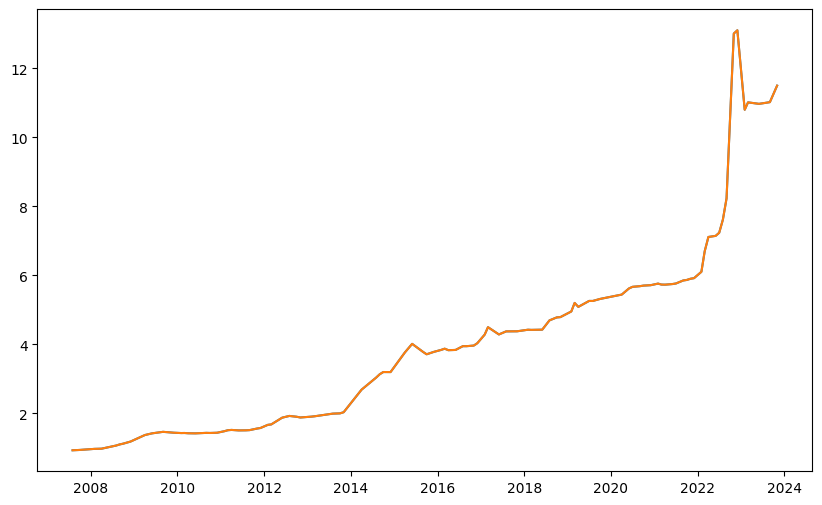

In [343]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df["Mid Rate_x"])
ax.plot(df["Mid Rate_y"])

In [344]:
df["mid_fx"] = df["Mid Rate_y"] 
df = df.drop(columns=["Mid Rate_x", "Mid Rate_y"])

In [345]:
df.isna().sum()

m2_plus                     4
m2                          4
m1                          4
private_credit              4
policy_rate                 4
interbank_rate              4
lending_rate                4
gh_ref_rate                69
inflation_headline          4
inflation_food              4
inflation_nonfood           4
inflation_core             39
trade_balance_usd           4
exports_usd                 4
imports_usd                 4
gross_reserves_usd          4
net_reserves_usd            4
debt_public_pct_gdp        47
debt_domestic_pct_gdp      47
debt_external_pct_gdp      47
capital_adequacy            4
npl_ratio                   4
cieg_real_growth            5
cieg_real_level             5
m2_plus_yoy                 0
private_credit_yoy          0
Year                        0
real_policy_rate            4
real_interbank_rate         4
real_lending_rate           4
d_policy_rate               5
d_inflation                 5
inflation_lag1              4
policy_rat

In [346]:
thresh = 30
cols_to_drop = df.columns[df.isna().sum() > thresh]
df_main = df.drop(columns=cols_to_drop)
high_na_cols = df.columns[df.isna().sum() > 40]
df_high_na = df[high_na_cols].copy()
high_na_cols = df.columns[df.isna().sum() > 40]
df_high_na = df[high_na_cols].copy()

In [347]:
df_main.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,inflation_headline,inflation_food,inflation_nonfood,...,fx_dep_m,fx_dep_12m,reserves_net_change_12m,reserves_months_imports,npl_change,capital_adequacy_gap,Unemployment Rate,Buying,Selling,mid_fx
2007-08-01,4.75726,3.70662,2.13430,2.73050,12.50,11.71,24.25,10.41,10.03,10.69,...,NaN,NaN,NaN,NaN,NaN,5.01,5.09,0.9230,0.9345,0.9288
2007-10-01,5.13003,4.11015,2.61923,3.04774,12.50,12.44,24.25,10.14,8.81,11.11,...,1.038943,NaN,NaN,NaN,-0.24,4.90,5.09,0.9316,0.9453,0.9385
2008-02-01,5.75847,4.58013,2.71302,3.42766,13.50,12.02,24.17,13.21,11.23,14.68,...,3.218813,NaN,NaN,NaN,1.86,4.86,5.14,0.9579,0.9804,0.9692
2008-04-01,6.01074,4.75626,2.78303,3.64642,14.25,12.56,24.35,15.29,13.15,16.90,...,0.576133,NaN,NaN,NaN,0.27,4.49,5.14,0.9643,0.9853,0.9748
2008-08-01,6.69486,4.98611,2.86586,4.30304,17.00,17.39,24.08,18.10,17.56,18.50,...,8.868553,NaN,NaN,NaN,-1.35,4.32,5.14,1.0459,1.0844,1.0652


In [348]:
df_main.isna().sum()

m2_plus                     4
m2                          4
m1                          4
private_credit              4
policy_rate                 4
interbank_rate              4
lending_rate                4
inflation_headline          4
inflation_food              4
inflation_nonfood           4
trade_balance_usd           4
exports_usd                 4
imports_usd                 4
gross_reserves_usd          4
net_reserves_usd            4
capital_adequacy            4
npl_ratio                   4
cieg_real_growth            5
cieg_real_level             5
m2_plus_yoy                 0
private_credit_yoy          0
Year                        0
real_policy_rate            4
real_interbank_rate         4
real_lending_rate           4
d_policy_rate               5
d_inflation                 5
inflation_lag1              4
policy_rate_lag1            4
log_m2_plus                 4
log_credit                  4
private_credit_real_yoy     4
fx_log                      0
fx_dep_m  

In [350]:
df_main.to_csv("../data/processed/ghana_macroecon_ds.csv")